In [1]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 5\\030')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
TsingTao=pd.read_csv('TsingTao.csv')
TsingTao.index=TsingTao.iloc[:,1]
TsingTao.index=pd.to_datetime(TsingTao.index, format='%Y-%m-%d')
TsingTao=TsingTao.iloc[:,2:]
TsingTao.head(n=3)

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,48.80,48.98,46.90,47.81,2592800
2014-01-03,47.60,48.38,47.01,47.59,1560700
2014-01-06,47.63,47.79,46.62,46.70,1860900


In [4]:
Close=TsingTao.Close

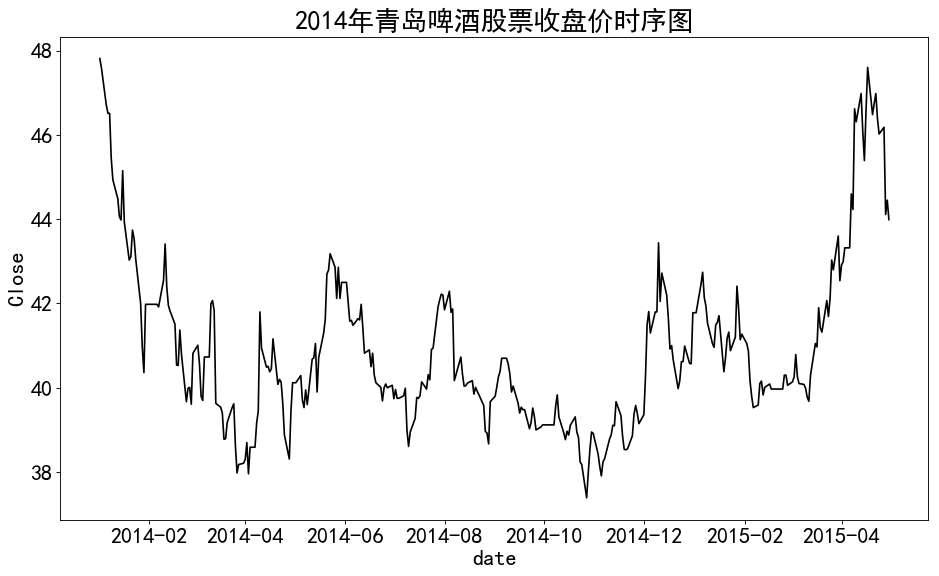

In [12]:
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=20)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close,'k')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('2014年青岛啤酒股票收盘价时序图')
plt.show()

In [8]:
Sma5=pd.Series(0.0,index=Close.index)

In [9]:
for i in range(4,len(Close)):
    Sma5[i]=np.mean(Close[(i-4):(i+1)])

Sma5.tail()

Date
2015-04-24    46.522
2015-04-27    46.462
2015-04-28    45.936
2015-04-29    45.430
2015-04-30    44.950
dtype: float64

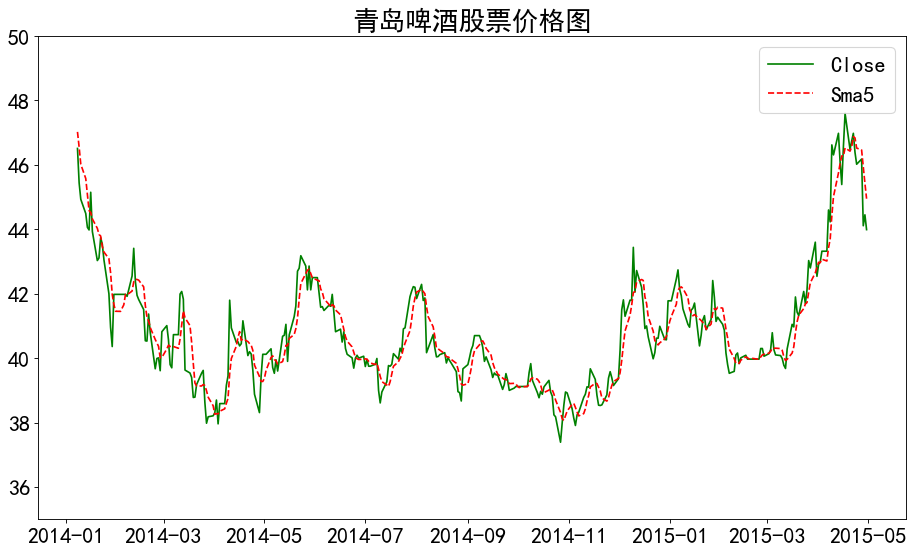

In [11]:
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=20)
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Sma5[4:],label="Sma5",color='r',linestyle='dashed')
plt.title("青岛啤酒股票价格图")
plt.ylim(35,50)
plt.legend()
plt.show()

In [13]:
def smaCal(tsPrice,k):
    import pandas as pd
    Sma=pd.Series(0.0,index=tsPrice.index)
    for i in range(k-1,len(Close)):
        Sma[i]=sum(Close[(i-k+1):(i+1)])/k
    return(Sma)

In [14]:
sma5=smaCal(Close ,5)    
sma5.tail()

Date
2015-04-24    46.522
2015-04-27    46.462
2015-04-28    45.936
2015-04-29    45.430
2015-04-30    44.950
dtype: float64

In [15]:
b=np.array([1,2,3,4,5])
w=b/sum(b)
w

array([ 0.06666667,  0.13333333,  0.2       ,  0.26666667,  0.33333333])

In [16]:
m1Close=Close[0:5]
wec=w*m1Close
sum(wec)

46.778666666666666

In [17]:
Wma5=pd.Series(0.0,index=Close.index)
for i in range(4,len(Close)):
    Wma5[i]=sum(w*Close[(i-4):(i+1)])
Wma5[2:7]

Date
2014-01-06     0.000000
2014-01-07     0.000000
2014-01-08    46.778667
2014-01-09    46.250667
2014-01-10    45.710667
dtype: float64

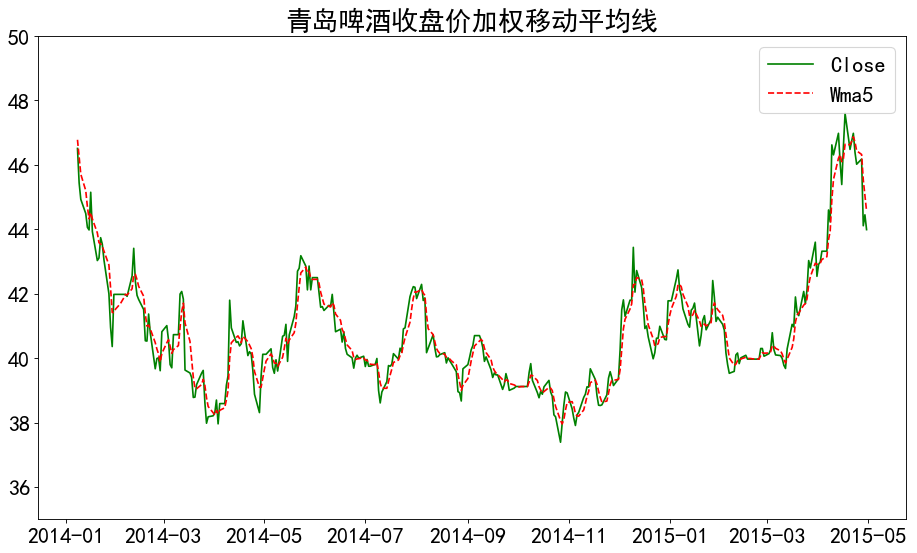

In [18]:
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=20)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close[4:],label="Close",color='g')
plt.plot(Wma5[4:],label="Wma5",color='r',linestyle='dashed')
plt.title("青岛啤酒收盘价加权移动平均线")
plt.ylim(35,50)
plt.legend()
plt.show()

In [19]:
def wmaCal(tsPrice,weight):
    import pandas as pd
    import numpy as np
    k=len(weight)
    arrWeight=np.array(weight)
    Wma=pd.Series(0.0,index=tsPrice.index)
    for i in range(k-1,len(tsPrice.index)):
        Wma[i]=sum(arrWeight*tsPrice[(i-k+1):(i+1)])
    return(Wma)

In [20]:
wma5=wmaCal(Close,w)   
wma5.head()

Date
2014-01-02     0.000000
2014-01-03     0.000000
2014-01-06     0.000000
2014-01-07     0.000000
2014-01-08    46.778667
dtype: float64

In [21]:
wma5=wmaCal(Close,[0.1,0.15,0.2,0.25,0.3])
wma5.tail()

Date
2015-04-24    46.4585
2015-04-27    46.3580
2015-04-28    45.6385
2015-04-29    45.1405
2015-04-30    44.6605
dtype: float64

In [22]:
Ema5_number1=np.mean(Close[0:5])
Ema5_number2=0.2* Close[5]+(1-0.2)*Ema5_number1
Ema5=pd.Series(0.0,index=Close.index)
Ema5[4]=Ema5_number1
Ema5[5]=Ema5_number2

In [23]:
for i in range(6,len(Close)):
    expo=np.array(sorted(range(i-4),reverse=True))
    w=(1-0.2)**expo
    Ema5[i]=sum(0.2*w*Close[5:(i+1)])+Ema5_number1*0.2**(i-5)

Ema5.tail()

Date
2015-04-24    46.283839
2015-04-27    46.263071
2015-04-28    45.832457
2015-04-29    45.555965
2015-04-30    45.242772
dtype: float64

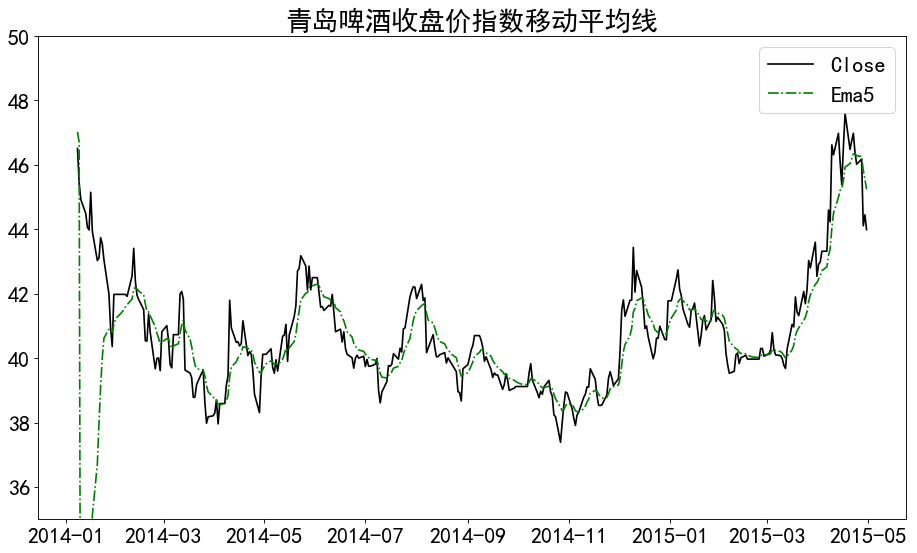

In [24]:
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=20)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close[4:],label="Close",color='k')
plt.plot(Ema5[4:],label="Ema5",\
         color='g',linestyle='-.')
plt.title("青岛啤酒收盘价指数移动平均线")
plt.ylim(35,50)
plt.legend()
plt.show()

In [25]:
def ewmaCal(tsprice,period=5,exponential=0.2):
    import pandas as pd
    import numpy as np
    Ewma=pd.Series(0.0,index=tsprice.index)
    Ewma[period-1]=np.mean(tsprice[:period])
    for i in range(period,len(tsprice)):
        Ewma[i]=exponential*tsprice[i]+(1-exponential)*Ewma[period-1]
    return(Ewma)

In [26]:
Ewma=ewmaCal(Close,5,0.2)
Ewma.head()

Date
2014-01-02     0.000
2014-01-03     0.000
2014-01-06     0.000
2014-01-07     0.000
2014-01-08    47.024
dtype: float64

In [27]:
import movingAverage as ma
Ewma10=ma.ewmaCal(Close,10,0.2)
Ewma10.tail(n=3)

Date
2015-04-28    45.832457
2015-04-29    45.555965
2015-04-30    45.242772
dtype: float64

In [28]:
#ChinaBank
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import movingAverage as ma
ChinaBank=pd.read_csv('ChinaBank.csv')
ChinaBank.index=ChinaBank.iloc[:,1]
ChinaBank.index=pd.to_datetime(ChinaBank.index, format='%Y-%m-%d')
ChinaBank=ChinaBank.iloc[:,2:]

In [29]:
CBClose=ChinaBank.Close
CBClose.describe()

count    345.000000
mean       3.145739
std        0.775868
min        2.450000
25%        2.600000
50%        2.700000
75%        3.890000
max        5.060000
Name: Close, dtype: float64

In [30]:
Close15=CBClose['2015']

In [31]:
Sma10=ma.smaCal(Close15,10)
Sma10.tail(n=3)

Date
2015-04-28    4.815
2015-04-29    4.841
2015-04-30    4.845
dtype: float64

In [32]:
weight=np.array(range(1,11))/sum(range(1,11))
Wma10=ma.wmaCal(Close15,weight)
Wma10.tail(n=3)

Date
2015-04-28    4.834364
2015-04-29    4.862545
2015-04-30    4.862364
dtype: float64

In [33]:
expo= 2/(len(Close15)+1)
Ema10=ma.ewmaCal(Close15,10,expo)
Ema10.tail(n=3)

Date
2015-04-28    4.427053
2015-04-29    4.439534
2015-04-30    4.448741
dtype: float64

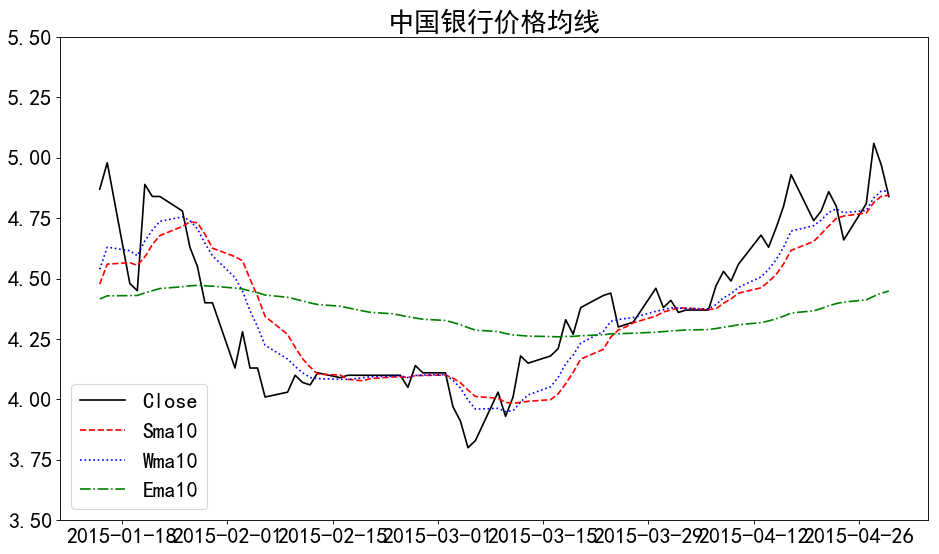

In [34]:
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=20)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close15[10:],label="Close",color='k')
plt.plot(Sma10[10:],label="Sma10",color='r',linestyle='dashed')
plt.plot(Wma10[10:],label="Wma10",color='b',linestyle=':')
plt.plot(Ema10[10:],label="Ema10",color='G',linestyle='-.')
plt.title("中国银行价格均线")
plt.ylim(3.5,5.5)
plt.legend()
plt.show()

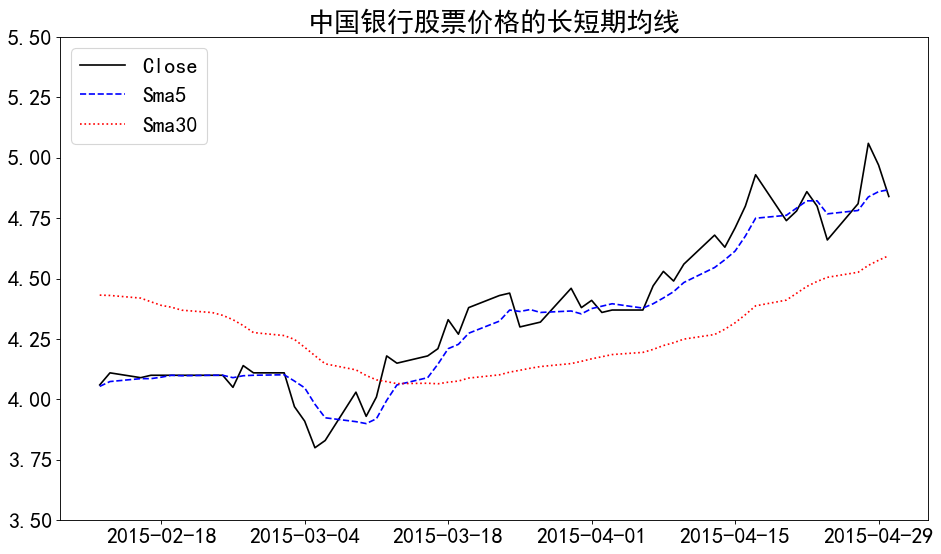

In [35]:
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=20)
Sma5=ma.smaCal(Close15,5)
Sma30=ma.smaCal(Close15,30)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(Close15[30:],label="Close",color='k')
plt.plot(Sma5[30:],label="Sma5",color='b',linestyle='dashed')
plt.plot(Sma30[30:],label="Sma30",color='r',linestyle=':')
plt.title("中国银行股票价格的长短期均线")
plt.ylim(3.5,5.5)
plt.legend()
plt.show()

In [36]:
#trading-sma10 and close
CBSma10=ma.smaCal(CBClose,10)

SmaSignal=pd.Series(0,index=CBClose.index)
for i in range(10,len(CBClose)):
    if all([CBClose[i]>CBSma10[i],CBClose[i-1]<CBSma10[i-1]]):
        SmaSignal[i]=1;
    elif all([CBClose[i]<CBSma10[i],CBClose[i-1]>CBSma10[i-1]]):
         SmaSignal[i]=-1;

In [37]:
SmaTrade=SmaSignal.shift(1).dropna()
SmaTrade.head(n=3)

Date
2014-01-03    0.0
2014-01-06    0.0
2014-01-07    0.0
dtype: float64

In [38]:
SmaBuy=SmaTrade[SmaTrade==1]
SmaBuy.head(n=3)

Date
2014-01-23    1.0
2014-01-29    1.0
2014-02-11    1.0
dtype: float64

In [39]:
SmaSell=SmaTrade[SmaTrade==-1]
SmaSell.head(n=3)

Date
2014-01-24   -1.0
2014-02-10   -1.0
2014-02-25   -1.0
dtype: float64

In [40]:
CBRet=CBClose/CBClose.shift(1)-1
SmaRet=(CBRet*SmaTrade).dropna()

In [41]:
cumStock=np.cumprod(1+CBRet[SmaRet.index[0]:])-1
cumTrade=np.cumprod(1+SmaRet)-1
cumdata=pd.DataFrame({'cumTrade':cumTrade,\
                     'cumStock':cumStock})

In [42]:
cumdata.iloc[-6:,:]

,cumStock,cumTrade
Date,,
2015-04-23,0.839080,-0.100261
2015-04-24,0.785441,-0.100261
2015-04-27,0.842912,-0.129223
2015-04-28,0.938697,-0.083964
2015-04-29,0.904215,-0.083964
2015-04-30,0.854406,-0.083964


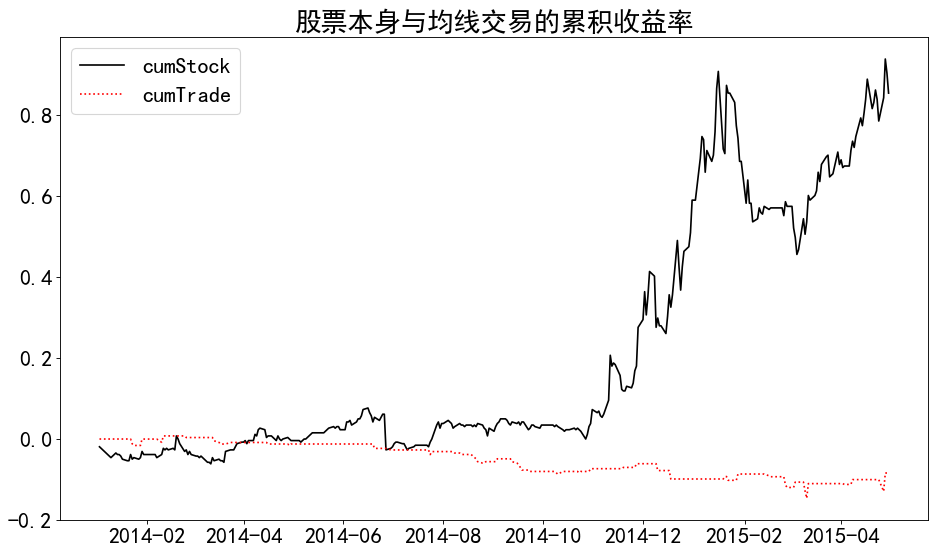

In [44]:
import matplotlib
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=20)
matplotlib.rcParams['axes.unicode_minus']=False
plt.plot(cumStock,label="cumStock",color='k')
plt.plot(cumTrade,label="cumTrade",color='r',linestyle=':')
plt.title("股票本身与均线交易的累积收益率")
plt.legend()
plt.show()

In [45]:
SmaRet[SmaRet==(-0)]=0
smaWinrate=len(SmaRet[SmaRet>0])/len(SmaRet[SmaRet!=0])
smaWinrate

0.3157894736842105

In [46]:
#short  and  long
Ssma5=ma.smaCal(CBClose,5);
Lsma30=ma.smaCal(CBClose,30);
SLSignal=pd.Series(0,index=Lsma30.index)
for i in range(1,len(Lsma30)):
    if all([Ssma5[i]>Lsma30[i],Ssma5[i-1]<Lsma30[i-1]]):
        SLSignal[i]=1
    elif all([Ssma5[i]<Lsma30[i],Ssma5[i-1]>Lsma30[i-1]]):
         SLSignal[i]=-1

In [47]:
SLSignal[SLSignal==1]
SLSignal[SLSignal==-1]

Date
2014-03-03   -1
2014-05-02   -1
2014-06-27   -1
2014-08-29   -1
2014-09-23   -1
2014-10-08   -1
2015-02-03   -1
dtype: int64

In [48]:
SLTrade=SLSignal.shift(1)

In [49]:
Long=pd.Series(0,index=Lsma30.index)
Long[SLTrade==1]=1
CBRet=CBClose/CBClose.shift(1)-1
LongRet=(Long*CBRet).dropna()
winLrate=len(LongRet[LongRet>0])/len(LongRet[LongRet!= 0] )
winLrate

0.5

In [50]:
Short= pd.Series(0,index=Lsma30.index)
Short[SLTrade==-1]=-1
ShortRet=(Short*CBRet).dropna()
winSrate=len(ShortRet[ShortRet>0])/len(ShortRet[ShortRet!=0])
winSrate

0.4

In [51]:
SLtradeRet=(SLTrade*CBRet).dropna()
winRate= len(SLtradeRet[ SLtradeRet>0])/len(\
         SLtradeRet[SLtradeRet!=0])
winRate

0.4444444444444444

In [52]:
cumLong=np.cumprod(1+LongRet)-1
cumShort=np.cumprod(1+ShortRet)-1
cumSLtrade=np.cumprod(1+SLtradeRet)-1

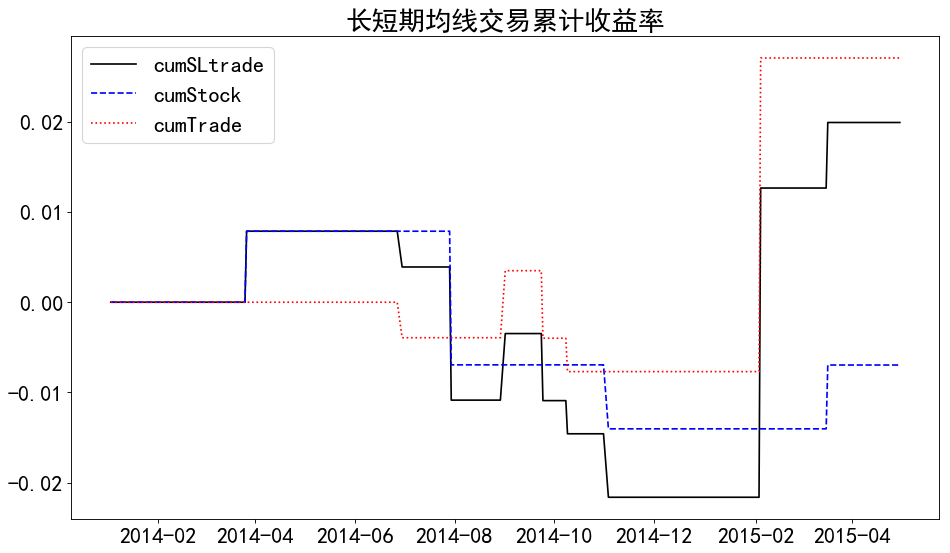

In [53]:
#import matplotlib.pyplot as plt
#import matplotlib
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=20)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.unicode_minus'] = False
plt.plot(cumSLtrade,label="cumSLtrade",color='k')
plt.plot(cumLong, label="cumStock",\
         color='b',linestyle='dashed')
plt.plot(cumShort,label="cumTrade",\
         color='r',linestyle=':')
plt.title("长短期均线交易累计收益率")
plt.legend(loc='best')
plt.show()

In [54]:
#MACD
DIF=ma.ewmaCal(CBClose,12,2/(1+12))\
       -ma.ewmaCal(CBClose,26,2/(1+26))
DIF.tail(n=3)

Date
2015-04-28    0.150903
2015-04-29    0.155585
2015-04-30    0.147109
dtype: float64

In [55]:
DEA=ma.ewmaCal(DIF,9,2/(1+9))
DEA.tail()

Date
2015-04-24    0.133966
2015-04-27    0.133887
2015-04-28    0.137290
2015-04-29    0.140949
2015-04-30    0.142181
dtype: float64

In [56]:
MACD=DIF-DEA
MACD.tail(n=3)

Date
2015-04-28    0.013613
2015-04-29    0.014636
2015-04-30    0.004928
dtype: float64

E:\Data_analysis_plan\python_36_install\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


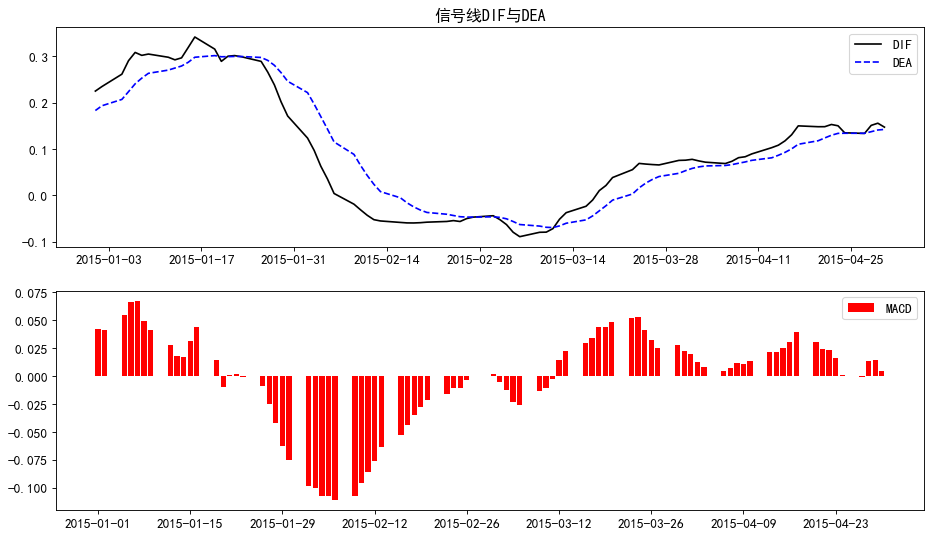

In [60]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(14,8),dpi=80)
plt.rc('font', family='SimHei', size=12)
matplotlib.rcParams['axes.unicode_minus']=False
plt.subplot(211)
plt.plot(DIF['2015'],\
      label="DIF",color='k')
plt.plot(DEA['2015'], label="DEA",\
        color='b',linestyle='dashed')
plt.title("信号线DIF与DEA")
plt.legend()
plt.subplot(212)
plt.bar(left=MACD['2015'].index,\
        height=MACD['2015'],\
        label='MACD',color='r')
plt.legend()
plt.show()

In [65]:
macddata=pd.DataFrame()
macddata['DIF']= DIF['2015']
macddata['DEA']= DEA['2015']
macddata['MACD']= MACD['2015']

In [67]:
macddata.head(3)

,DIF,DEA,MACD
Date,,,
2015-01-01,0.224806,0.182903,0.041903
2015-01-02,0.234660,0.193254,0.041406
2015-01-05,0.261245,0.206852,0.054393


E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


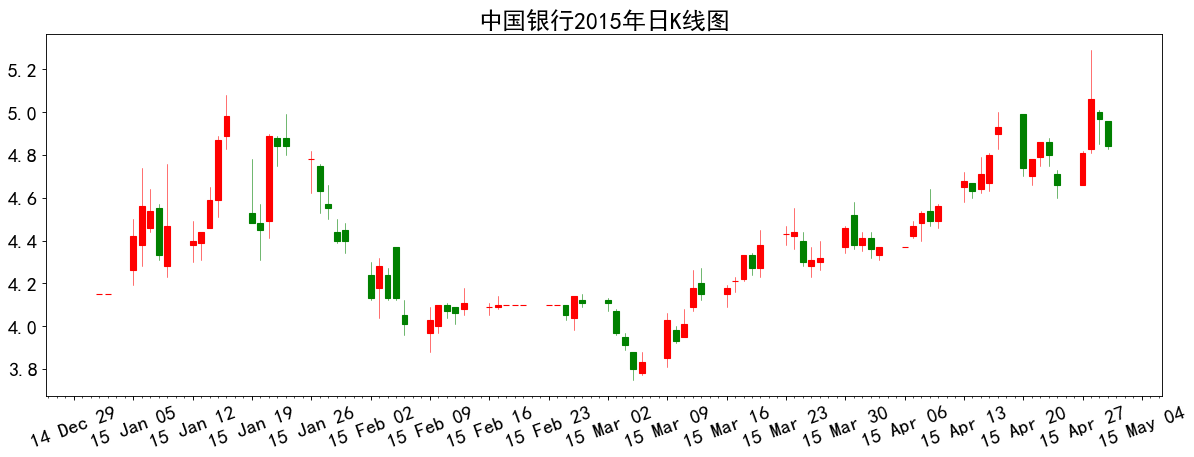

E:\Data_analysis_plan\python_36_install\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


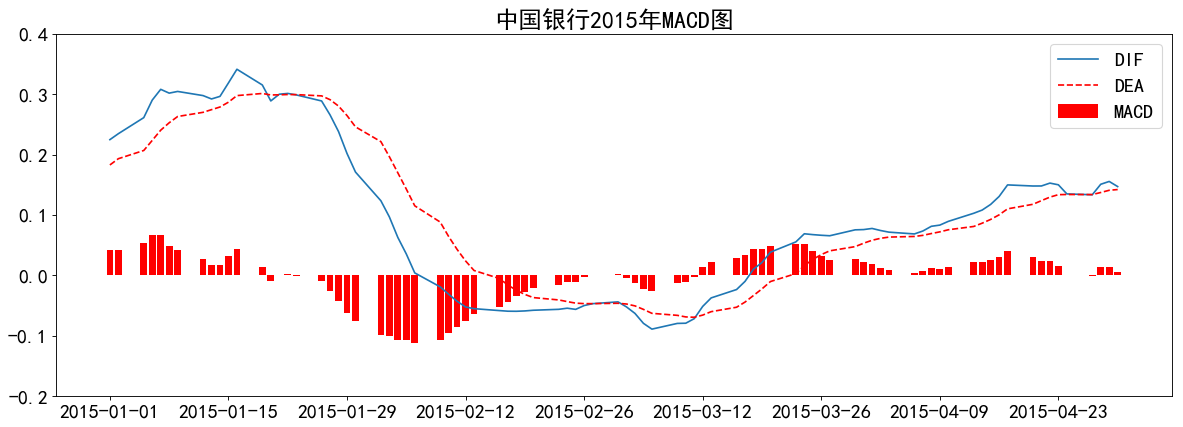

In [90]:
import candle
plt.figure(figsize=(18,6),dpi=80)
plt.rc('font', family='SimHei', size=18)
candle.candleLinePlots(ChinaBank['2015'],candleTitle='中国银行2015年日K线图',splitFigures=False)

plt.figure(figsize=(18,6),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.plot(macddata['DIF'],label="DIF")
plt.plot(macddata['DEA'],\
         label="DEA",color='red',\
         linestyle='dashed')
plt.bar(left=macddata['MACD'].index,\
        height=macddata['MACD'],\
        label='MACD',color='r')
plt.title("中国银行2015年MACD图")
plt.ylim(-0.2,0.4)
plt.legend()
plt.show()

In [130]:
macdSignal=pd.Series(0,index=DIF.index)
for i in range(1,len(DIF)):
    if all([DIF[i]>DEA[i]>0.0,DIF[i-1]<DEA[i-1]]):
        macdSignal[i]=1
    elif all([DIF[i]<DEA[i]<0.0,DIF[i-1]>DEA[i-1]]):
        macdSignal[i]=-1
macdSignal.tail()

Date
2015-04-24    0
2015-04-27    0
2015-04-28    1
2015-04-29    0
2015-04-30    0
dtype: int64

In [131]:
macdTrade=macdSignal.shift(1)

CBRet=CBClose/CBClose.shift(1)-1
macdRet=(CBRet*macdTrade).dropna()
macdRet[macdRet==-0]=0

In [148]:
macdRet.head()

Date
2014-01-06    0.0
2014-01-07    0.0
2014-01-08    0.0
2014-01-09    0.0
2014-01-10    0.0
dtype: float64

In [149]:
macdWinRate=len(macdRet[macdRet>0])/len(macdRet[macdRet!=0])
macdWinRate

0.5

In [150]:
AllSignal=SmaSignal+SLSignal+macdSignal
for i in AllSignal.index:
    if AllSignal[i]>1:
        AllSignal[i]=1
    elif AllSignal[i]<-1:
        AllSignal[i]=-1
    else:
        AllSignal[i]=0

In [151]:
AllSignal[AllSignal==1]

Date
2014-05-13    1
2015-01-21    1
dtype: int64

In [152]:
AllSignal[AllSignal==-1]

Date
2014-06-27   -1
2014-10-08   -1
2015-03-03   -1
dtype: int64

In [153]:
tradSig=AllSignal.shift(1).dropna()

In [154]:
CBClose=CBClose[-len(tradSig):]
asset=pd.Series(0.0,index=Close.index)
cash=pd.Series(0.0,index=CBClose.index)
share=pd.Series(0,index=CBClose.index)

# 当价格连续两天上升且交易信号没有显示卖出时，第一次开账户持有股票

In [155]:
entry=3
cash[:entry]=20000
while entry<len(CBClose):
    cash[entry]=cash[entry-1]
    if all([CBClose[entry-1]>=CBClose[entry-2],\
            CBClose[entry-2]>=CBClose[entry-3],\
            AllSignal[entry-1]!=-1]):
        share[entry]=1000
        cash[entry]= cash[entry]-1000*CBClose[entry]
        break
    entry+=1

# 根据sigal买卖股票

In [156]:
i=entry+1
while i<len(tradSig):
    cash[i]=cash[i-1]
    share[i]=share[i-1]
    flag=1
    if tradSig[i]==1:
        share[i]= share[i]+3000
        cash[i]=cash[i]-3000*CBClose[i]-3000*CBClose[i]*0.0003 #3000*CBClose[i]0.0003意为交易扣除千分之0.3的手续费

    if all([tradSig[i]==-1,share[i]>0]):
        share[i]= share[i]-1000
        cash[i]=cash[i]+1000*CBClose[i]-1000*CBClose[i]*0.0003 #1000*CBClose[i]0.0003意为交易扣除千分之0.3的手续费
    i+=1

In [157]:
asset=cash+share*CBClose

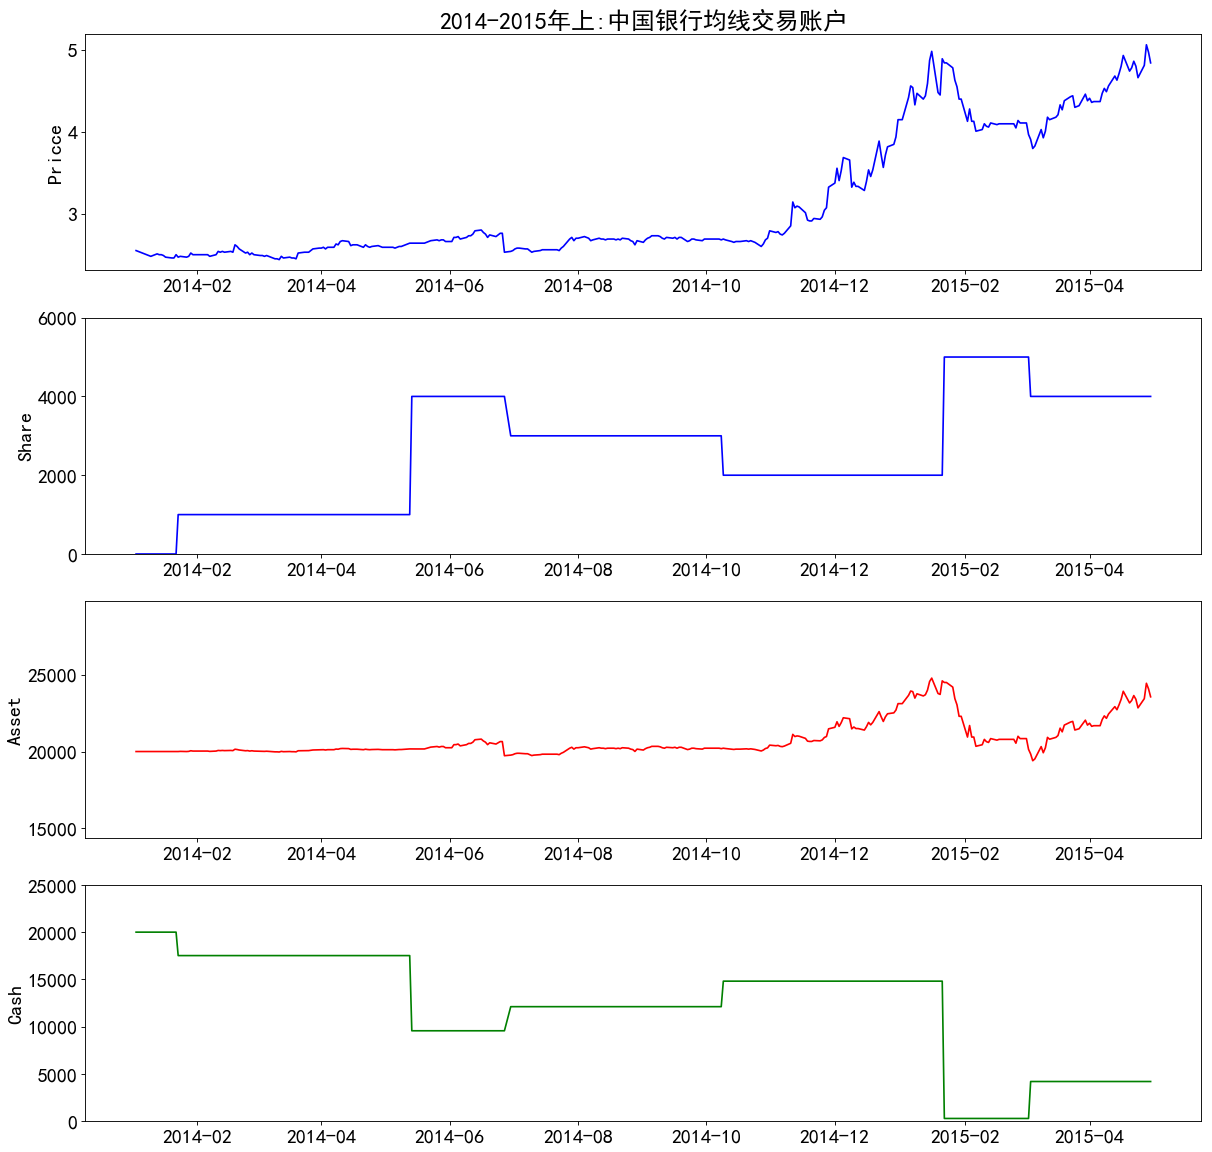

In [158]:
plt.figure(figsize=(18,18),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.subplot(411)
plt.title("2014-2015年上:中国银行均线交易账户")
plt.plot(CBClose, color='b')
plt.ylabel("Price")

plt.subplot(412)
plt.plot(share, color='b')
plt.ylabel("Share")
plt.ylim(0,max(share)+1000)

plt.subplot(413)
plt.plot(asset,label="asset",color='r')
plt.ylabel("Asset")
plt.ylim(min(asset)-5000,max(asset)+5000)

plt.subplot(414)
plt.plot(cash, label="cash",color='g')
plt.ylabel("Cash")
plt.ylim(0,max(cash)+5000)

plt.show()

In [159]:
TradeReturn=(asset[-1]-20000)/20000
TradeReturn

0.17802555000000012

In [160]:
print('MACD策略交易收益为: {:.5%}'.format(TradeReturn))

MACD策略交易收益为: 17.80256%


# Python 输出百分比的两种方式http://blog.csdn.net/u013553529/article/details/78567696

In [161]:
import pandas as pd
import numpy as np
import movingAverage as ma
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')

# 1.采集原数据，对道琼斯指数(股票名称"DJIA")2011-2014年度交易记录进行分析，计算30日SMA、30日WMA和30日EMA的值，绘制此三条均线图，分析这三条均线的平均程度有何差异

In [162]:
dow = pd.read_csv('Data/Part5/004/problem30-1.csv',
                index_col='date')               
dow.index.name='Date'
dow.index = pd.to_datetime(dow.index,format='%Y-%m-%d')

In [163]:
sma = ma.smaCal(dow.Close,30)
wma = ma.wmaCal(dow.Close,[(i+1)/465 for i in range(30)])
ema = ma.ewmaCal(dow.Close,30,0.8)

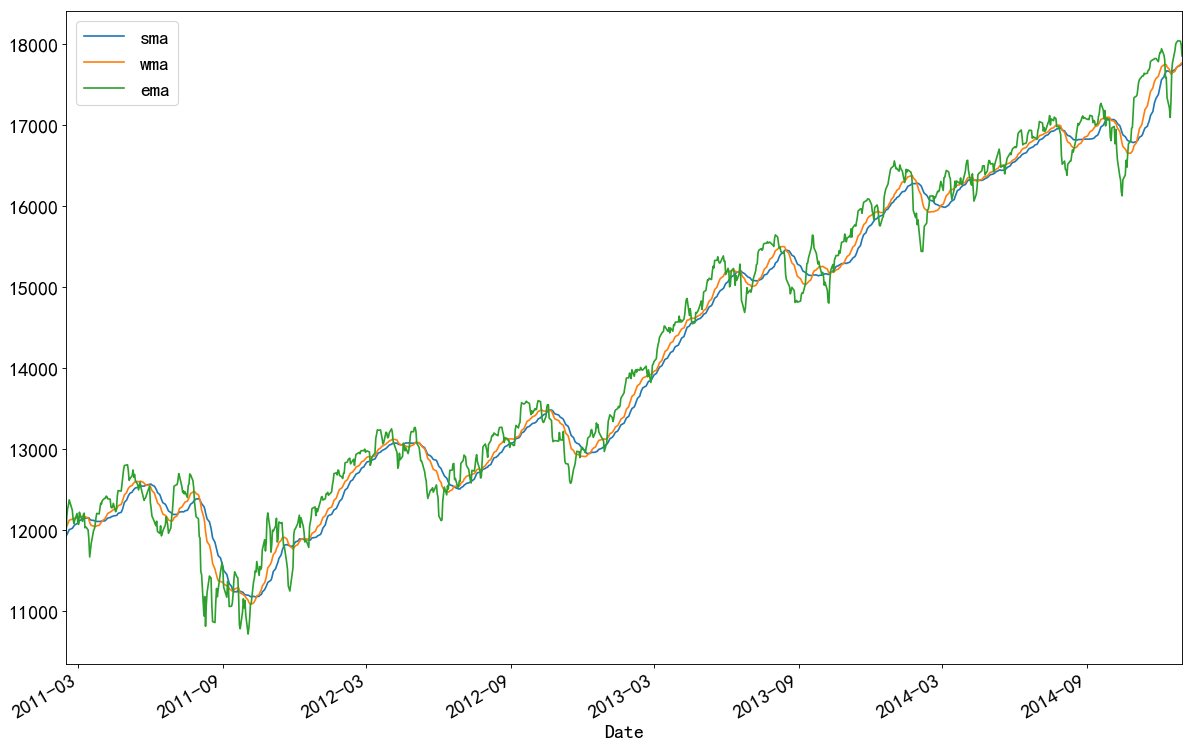

In [168]:
plt.figure(figsize=(18,12),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
maValues = pd.concat([sma,wma,ema],1).replace(0,np.nan).dropna()
maValues.columns = ['sma','wma','ema']
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=maValues.plot(ax=axe1)
plt.show()

# 2.获取中国银行股票2010年1月1日到2014年1月1日的交易数据，
# ①计算14日动量值，绘制收盘价与动量值的曲线图

In [169]:
zgyh = pd.read_csv('Data/Part5/004/problem30-2.csv',
                index_col='date')
                
zgyh.index.name='Date'

zgyh.index = pd.to_datetime(zgyh.index,format='%Y-%m-%d')

In [170]:
import matplotlib.pyplot as plt
mom14 = (zgyh.Close-zgyh.Close.shift(14))/zgyh.Close.shift(14)

ma14 = ma.smaCal(zgyh.Close,14)

data = pd.concat([zgyh.Close,mom14,ma14],1).dropna()

data.columns = ['Close','Mom','SMA']

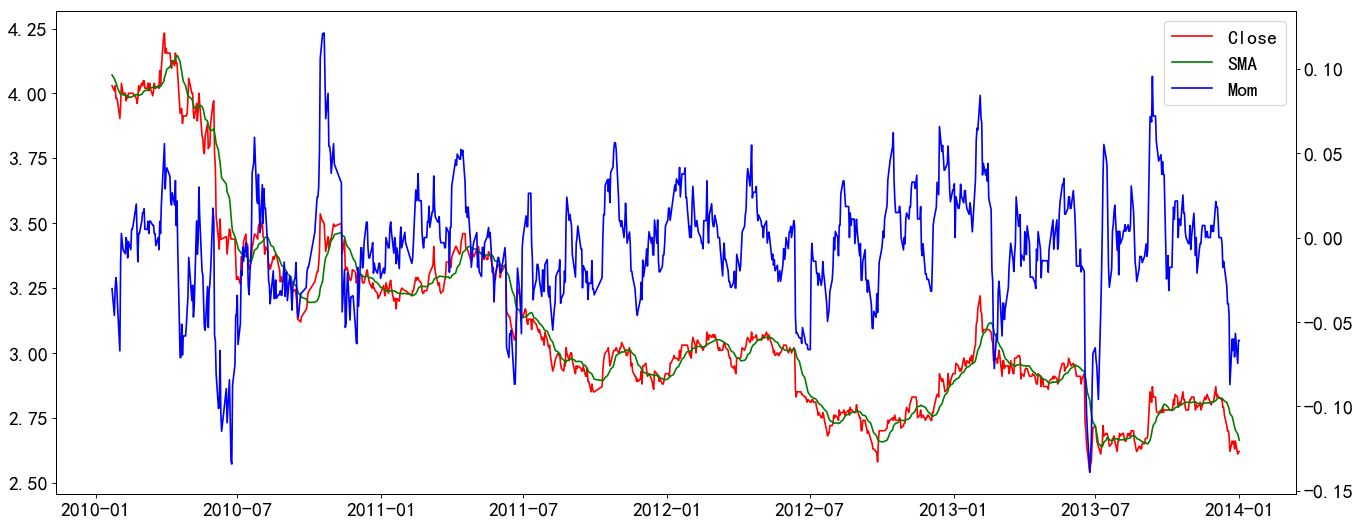

In [182]:
plt.figure(figsize=(20,8),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
axis1 = plt.subplot()
plot1, = axis1.plot(data.index,data.Close,'-r',label='Close')
plot2, = axis1.plot(data.index,data.SMA,'-g',label='SMA')
axis2 = axis1.twinx()
plot3, = axis2.plot(data.index,data.Mom,'-b',label='Mom')
plt.legend(handles=[plot1,plot2,plot3])
plt.show()

# ②观察上述K线图、均线和动量线图，并开发交易策略

In [176]:
ret = (zgyh.Close-zgyh.Close.shift(1))/zgyh.Close.shift(1)
signal = np.all([data.Close > data.SMA, data.Mom>0],0)
signal = pd.Series(signal,index = ret[14:].index)
ret = ret[15:] * signal.shift(1)[1:]
ret.sum()

-0.2389164532938523

# 3.获取苹果公司股票(代码:"APPL")2014年度交易数据
# ①绘制其前两个月的日K线图，再提取期间的日收盘价数据，在蜡烛图的基础上绘制收盘价曲线图

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


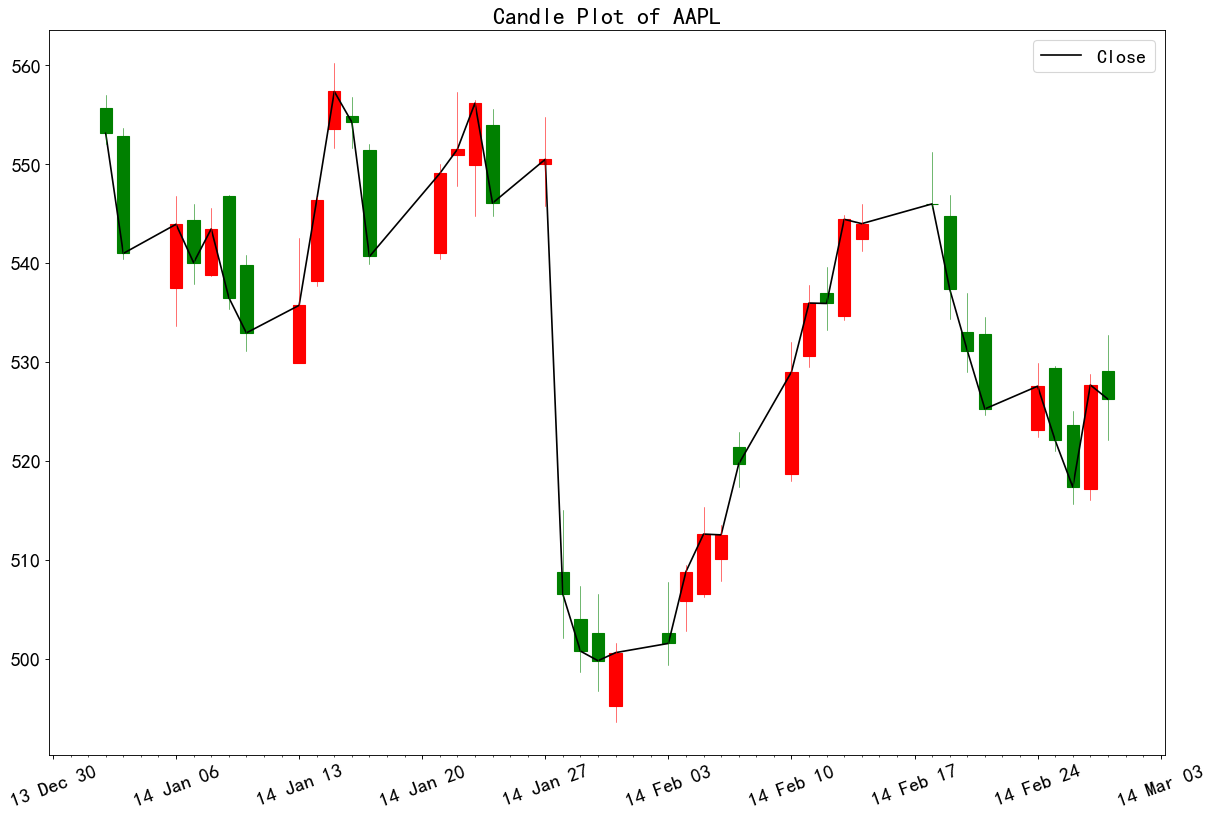

In [190]:
aapl = pd.read_csv('Data/Part5/004/problem30-3.csv',
                index_col='date')
                
aapl.index.name='Date'

aapl.index = pd.to_datetime(aapl.index,format='%Y-%m-%d')

import candle
plt.figure(figsize=(18,12),dpi=80)
plt.rc('font', family='SimHei', size=18)
candle.candleLinePlots(aapl['2014-01':'2014-02'],
    candleTitle='Candle Plot of AAPL',splitFigures=False,Data=aapl.Close['2014-01':'2014-02'])

# ②提取前5个月的数据，求离差值DIF，信号线DEA和MACD的值，绘制DIF和DEA的曲线图和MACD的柱状图

In [191]:
aapl1 = aapl[:'2014-05']
#因为苹果发放了股利，为了价格的一致性，我们选取了Adjusted Price，即复权过的价格
dif = ma.ewmaCal(aapl1.Adjusted,12,2/13)-ma.ewmaCal(aapl1.Adjusted,26,2/27)
dif = dif[25:]
dea = ma.ewmaCal(dif,9,2/10)
dea = dea[8:]
dif = dif[8:]

In [192]:
macd = dif -dea

E:\Data_analysis_plan\python_36_install\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


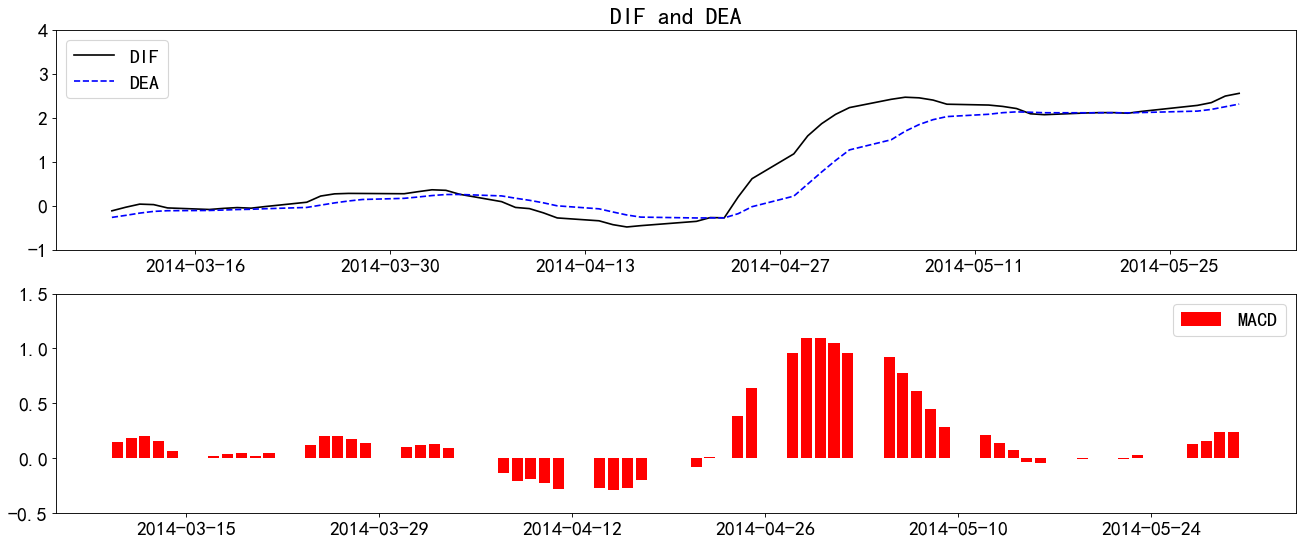

In [198]:
plt.figure(figsize=(20,8),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.subplot(211)
plt.plot(dif[12:],label="DIF",color='k')
plt.plot(dea[12:], label="DEA",color='b',linestyle='dashed')
plt.title("DIF and DEA")
plt.ylim(-1,4)
plt.legend()
plt.subplot(212)
plt.bar(left=macd[12:].index,height=macd[12:],
       label='MACD',color='r')
plt.ylim(-0.5,1.5)
plt.legend()
plt.show()

# ③根据DIF与DEA线的交叉背离策略，对标的作交易实测，并设置asset、cash和share这三种账户

In [199]:
price = aapl1.Adjusted
dat = pd.concat([price,dea,dif],1).dropna()
dat.columns = ['price','dea','dif']
asset = 100000 * np.ones(len(dat))
cash = 100000 * np.ones(len(dat))
share = np.zeros(len(dat))
for i in range(1,len(dat)):
    cash[i]=cash[i-1]+share[i-1]*dat.price[i]
    asset[i]=cash[i]
    if dat.dif[i] > dat.dea[i] >0 and dat.dif[i-1] < dat.dea[i-1]:
        share[i]=100
        cash[i]=cash[i]-100*dat.price[i]
    elif dat.dif[i] < dat.dea[i] < 0 and dat.dif[i-1] > dat.dea[i-1]:
        share[i]=-100 #short
        cash[i]=cash[i]+100*dat.price[i]

In [200]:
asset[-5:]

array([ 100022.3615,  100183.0869,  100183.0869,  100183.0869,  100183.0869])

In [202]:
price.head()

Date
2014-01-02    76.419139
2014-01-03    74.740527
2014-01-06    75.148089
2014-01-07    74.610660
2014-01-08    75.083159
Name: Adjusted, dtype: float64

# 4.乖离率指标(BIAS)是一种衡量股价偏离其均线程度的指标，当股价与均价偏差较大，股价修正偏离的可能性越大
# ①利用上题的原数据，计算苹果公司的6日乖离率指标

In [212]:
SMA6 = ma.smaCal(aapl.Close,6)
BIAS6 = (aapl.Close-SMA6)/SMA6*100

In [209]:
BIAS6=BIAS6.dropna()

In [221]:
BIAS6[5:].head()

Date
2014-01-09   -1.195192
2014-01-10   -1.242486
2014-01-13   -0.564246
2014-01-14    1.337217
2014-01-15    2.821298
dtype: float64

# ②继续使用上题原数据，使用9日指数移动平均数指标和38日简单移动平均数指标计算苹果公司股价的均线乖离率

In [225]:
EMA9 = ma.ewmaCal(aapl.Close,9)
SMA38 = ma.smaCal(aapl.Close,38)
BIAS = (EMA9 - SMA38)/SMA38

In [236]:
BIAS[37:].head()

Date
2014-02-26   -0.010163
2014-02-27   -0.008721
2014-02-28   -0.008380
2014-03-03   -0.007319
2014-03-04   -0.005362
dtype: float64